## TP — Visualiser l’espace des genres

On dispose d’un dataframe `df_genres_distances` avec les colonnes :  
`"Unnamed: 0"` (nom de fichier), `"voyages"`, `"aventures"`, `"sentimental"`, `"genres"`.

**Exercice 1 — Explorer le jeu de données**  
1. Afficher les 5 premières lignes et un résumé (`info`).  
2. Lister les genres possibles (`df["genres"].unique()`).  
3. Tracer un barplot du nombre de textes par genre.

**Exercice 2 — Nuages de points dans l’espace des genres**  
1. Tracer un nuage de points `voyages` (x) vs `sentimental` (y), en colorant les points selon `genres`.  
2. Tracer un nuage de points `aventures` (x) vs `sentimental` (y), toujours coloré par `genres`.

**Exercice 3 — Heatmap des distances pour un genre**  
- Écrire une fonction `plot_genre_distance_heatmap(df, genre)` qui affiche cette matrice sous forme de heatmap.  

**Exercice 4 — Distance à la moyenne du genre et évolution temporelle**  
1. Extraire une colonne `year` à partir de `"Unnamed: 0"` (ex. `"1902_Loti-Pierre_..." → 1902`). 
2. Tracer, pour chaque genre, le « profil moyen » des trois scores (`voyages`, `aventures`, `sentimental`) - `x=year`; `y=voyage` pour les récits de voyages seuls par exemple.
3. Interpréter :  
   - quels genres semblent les plus « cohérents » (faible dispersion) ou les plus variés (forte dispersion) ?  



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_distances = pd.read_csv("df_genres_distances.csv")

In [3]:
df = df_distances.copy()

In [5]:
df.head()

,Unnamed: 0,voyages,aventures,sentimental,genres
0,1900_Verne-Jules-_Seconde-patrie.txt,0.054669,0.021006,0.087088,aventures
1,1901_Thurner-Georges_Mademoiselle-Flammette.txt,0.112905,0.054822,0.030193,sentimental
2,1902_Allais-Alphonse_Le-Captain-Cap.txt,0.060211,0.036255,0.071234,aventures
3,1902_Le-Rouge-Gustave_La-Princesse-des-airs_To...,0.051275,0.013558,0.075158,aventures
4,1902_Le-Rouge-Gustave_La-Princesse-des-airs_To...,0.042219,0.009491,0.078938,aventures


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   37 non-null     object 
 1   voyages      37 non-null     float64
 2   aventures    37 non-null     float64
 3   sentimental  37 non-null     float64
 4   genres       37 non-null     object 
dtypes: float64(3), object(2)
memory usage: 1.6+ KB


In [7]:
df.describe()

,voyages,aventures,sentimental
count,37.000000,37.000000,37.000000
mean,0.084261,0.062560,0.084273
std,0.050936,0.035075,0.057290
min,0.020595,0.009491,0.011962
25%,0.051275,0.036255,0.034388
50%,0.065520,0.054822,0.078856
75%,0.122041,0.086548,0.112299
max,0.195538,0.162020,0.195289


In [8]:
df["genres"].unique()

array(['aventures', 'sentimental', 'voyages'], dtype=object)

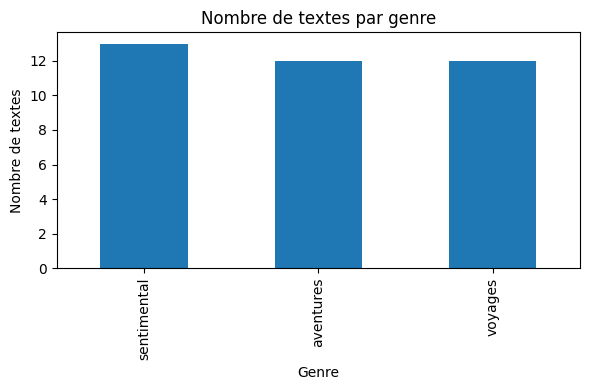

In [10]:
genre_counts = df["genres"].value_counts()

plt.figure(figsize=(6, 4))
genre_counts.plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Nombre de textes")
plt.title("Nombre de textes par genre")
plt.tight_layout()
plt.show()


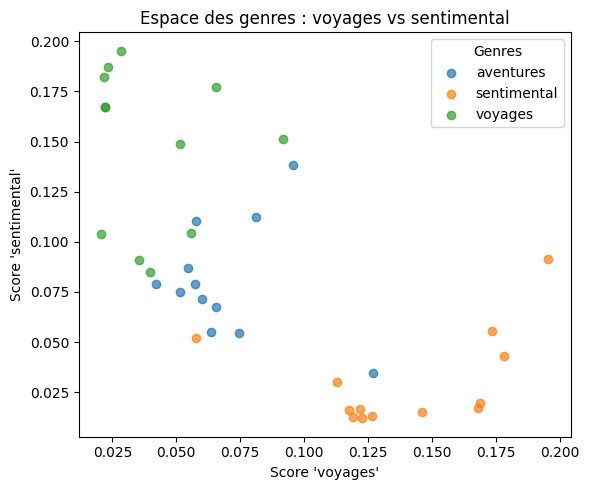

In [11]:
plt.figure(figsize=(6, 5))

for g, sub in df.groupby("genres"):
    plt.scatter(sub["voyages"], sub["sentimental"], label=g, alpha=0.7)

plt.xlabel("Score 'voyages'")
plt.ylabel("Score 'sentimental'")
plt.title("Espace des genres : voyages vs sentimental")
plt.legend(title="Genres")
plt.tight_layout()
plt.show()


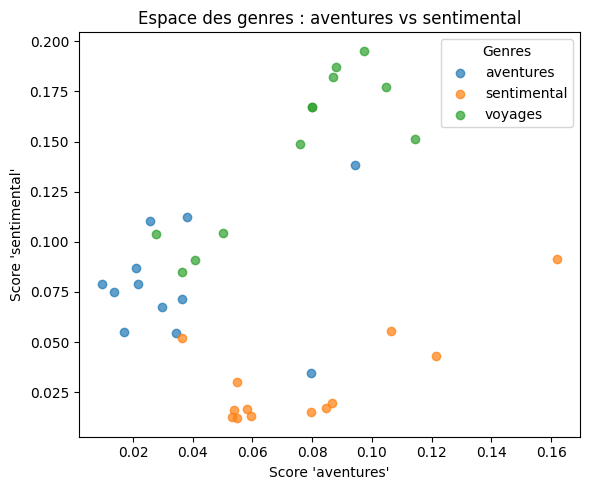

In [12]:
plt.figure(figsize=(6, 5))

for g, sub in df.groupby("genres"):
    plt.scatter(sub["aventures"], sub["sentimental"], label=g, alpha=0.7)

plt.xlabel("Score 'aventures'")
plt.ylabel("Score 'sentimental'")
plt.title("Espace des genres : aventures vs sentimental")
plt.legend(title="Genres")
plt.tight_layout()
plt.show()


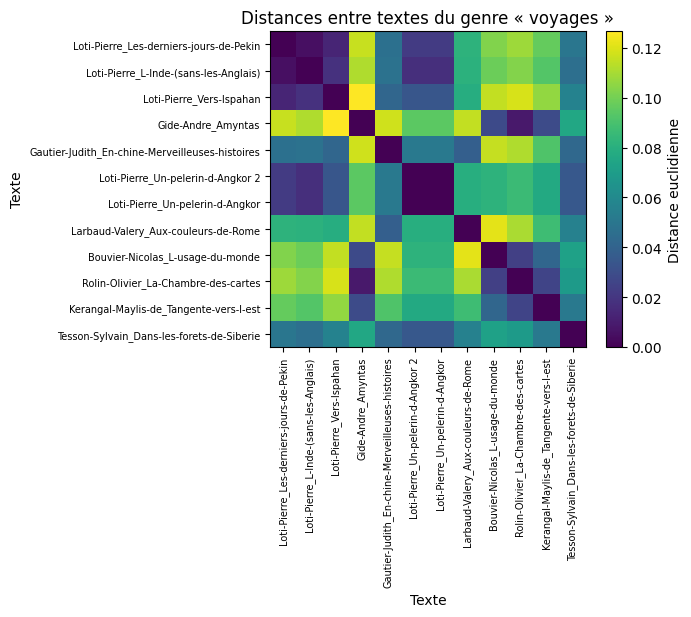

In [22]:
def plot_genre_distance_heatmap(df, genre, title_col="Unnamed: 0"):
    # Filtrer les textes du genre choisi
    sub = df[df["genres"] == genre].reset_index(drop=True)
    
    # Noms des livres (tu peux adapter le petit nettoyage si besoin)
    labels = sub[title_col].astype(str)
    # Exemple : enlever l'extension et ne garder que la partie après l'année
    labels = (
        labels.str.replace(".txt", "", regex=False)
              .str.replace(".xml", "", regex=False)
              .str.replace(".csv", "", regex=False)
              .str.split("_", n=1).str[-1]
    )

    # Coordonnées dans l'espace des genres
    cols = ["voyages", "aventures", "sentimental"]
    X = sub[cols].to_numpy()
    
    # Matrice de distances euclidiennes
    diff = X[:, None, :] - X[None, :, :]
    dist_matrix = np.sqrt((diff ** 2).sum(axis=2))

    plt.figure(figsize=(7, 6))
    im = plt.imshow(dist_matrix, cmap="viridis")

    plt.title(f"Distances entre textes du genre « {genre} »")
    plt.xlabel("Texte")
    plt.ylabel("Texte")

    n = len(sub)
    plt.xticks(range(n), labels, rotation=90, fontsize=7)
    plt.yticks(range(n), labels, fontsize=7)

    plt.colorbar(im, label="Distance euclidienne")
    plt.tight_layout()
    plt.show()

# Exemple d’appel
plot_genre_distance_heatmap(df, "voyages")


In [16]:
df["year"] = df["Unnamed: 0"].str.extract(r"^(\d{4})").astype(int)

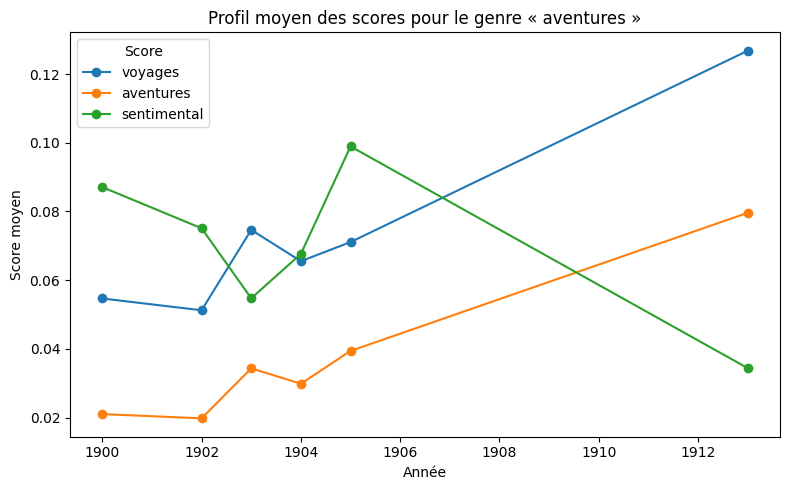

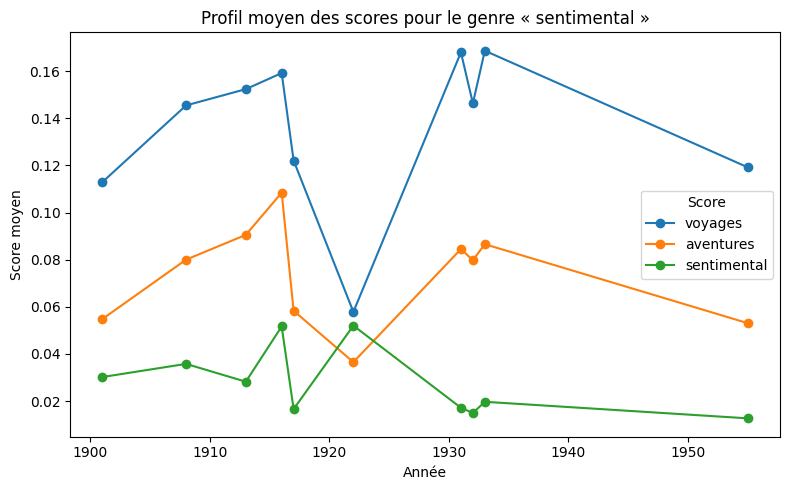

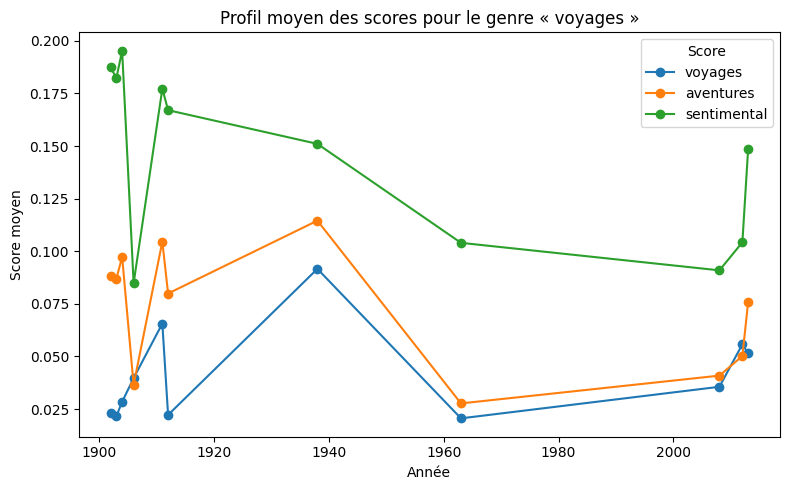

In [17]:
# Calculer, pour chaque couple (genre, year),
# la moyenne des trois scores voyages / aventures / sentimental
grouped = (
    df.groupby(["genres", "year"])[["voyages", "aventures", "sentimental"]]
      .mean()
      .reset_index()
)

# Visualiser le profil moyen pour chaque genre
for genre, sub in grouped.groupby("genres"):
    sub = sub.sort_values("year")
    
    plt.figure(figsize=(8, 5))
    for col in ["voyages", "aventures", "sentimental"]:
        plt.plot(sub["year"], sub[col], marker="o", label=col)
    
    plt.xlabel("Année")
    plt.ylabel("Score moyen")
    plt.title(f"Profil moyen des scores pour le genre « {genre} »")
    plt.legend(title="Score")
    plt.tight_layout()
    plt.show()


In [18]:
cols = ["voyages", "aventures", "sentimental"]

# Centroides (moyennes) de chaque genre
centroids = df.groupby("genres")[cols].transform("mean")

# Distance euclidienne de chaque texte à la moyenne de son genre
diff = df[cols] - centroids
df["dist_to_genre_mean"] = np.sqrt((diff ** 2).sum(axis=1))

# Résumé par genre : plus la moyenne est faible, plus le genre est "cohérent"
dispersion = df.groupby("genres")["dist_to_genre_mean"].describe()
print(dispersion)


             count      mean       std       min       25%       50%  \
genres                                                                 
aventures     12.0  0.035899  0.024917  0.012865  0.020459  0.030131   
sentimental   13.0  0.046362  0.028877  0.017093  0.032378  0.034865   
voyages       12.0  0.048450  0.018392  0.012008  0.038620  0.050799   

                  75%       max  
genres                           
aventures    0.035007  0.086847  
sentimental  0.051089  0.118288  
voyages      0.064908  0.072124  


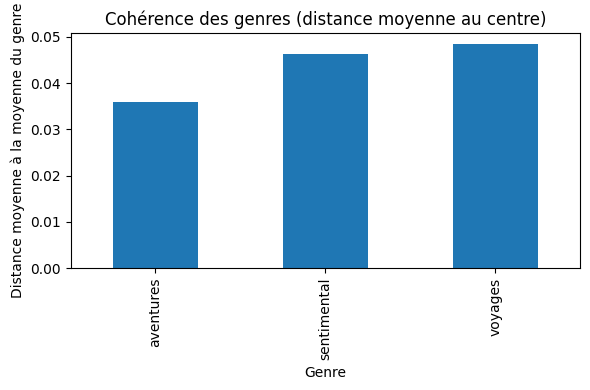

In [19]:
mean_dist = (
    df.groupby("genres")["dist_to_genre_mean"]
      .mean()
      .sort_values()
)

plt.figure(figsize=(6, 4))
mean_dist.plot(kind="bar")
plt.ylabel("Distance moyenne à la moyenne du genre")
plt.xlabel("Genre")
plt.title("Cohérence des genres (distance moyenne au centre)")
plt.tight_layout()
plt.show()


/tmp/ipykernel_11982/3048258136.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=genres)


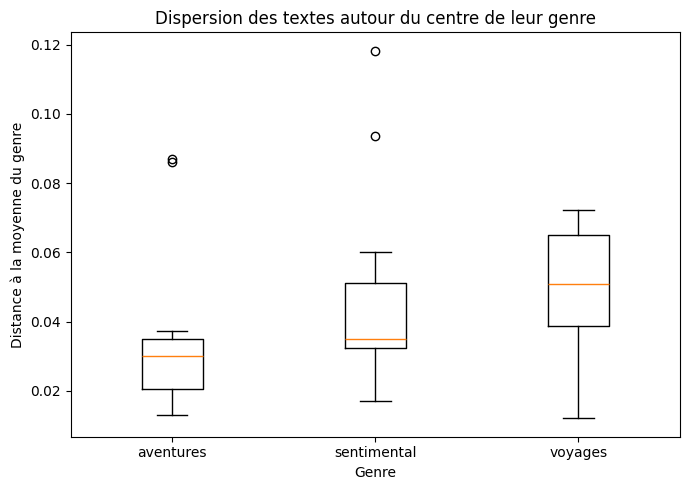

In [20]:
plt.figure(figsize=(7, 5))

# On veut un boxplot par genre, aligné sur l'axe x
genres = df["genres"].unique()
data = [df.loc[df["genres"] == g, "dist_to_genre_mean"] for g in genres]

plt.boxplot(data, labels=genres)
plt.ylabel("Distance à la moyenne du genre")
plt.xlabel("Genre")
plt.title("Dispersion des textes autour du centre de leur genre")
plt.tight_layout()
plt.show()


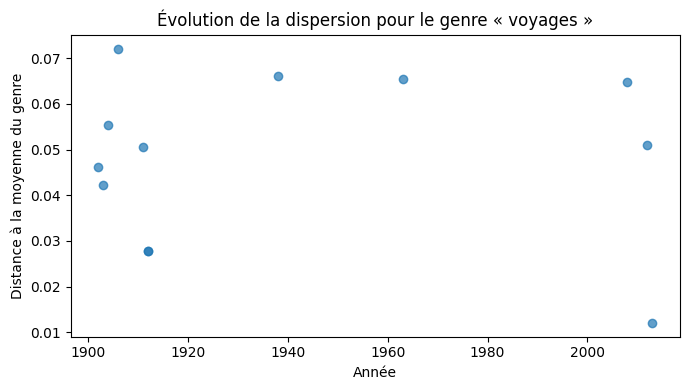

In [21]:
genre = "voyages"  # à changer

sub = df[df["genres"] == genre].copy()
sub = sub.sort_values("year")

plt.figure(figsize=(7, 4))
plt.scatter(sub["year"], sub["dist_to_genre_mean"], alpha=0.7)
plt.xlabel("Année")
plt.ylabel("Distance à la moyenne du genre")
plt.title(f"Évolution de la dispersion pour le genre « {genre} »")
plt.tight_layout()
plt.show()
